## Question 1

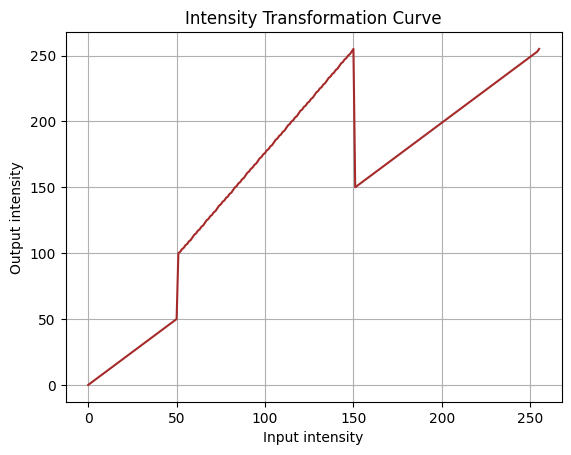

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define control points
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

# Create the transformation based on control points
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')   # from (0, 0) to (50, 50)
t2 = np.linspace(c[0, 1], c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')  # from (50, 50) to (50, 100)
t3 = np.linspace(c[1, 1], c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')  # from (50, 100) to (150, 255)
t4 = np.linspace(c[2, 1], c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')  # from (150, 255) to (150, 150)
t5 = np.linspace(c[3, 1], 255, 255 - c[3, 0]).astype('uint8')  # from (150, 150) to (255, 255)

# Concatenate to form the full transformation function
transform = np.concatenate((t1, t2, t3, t4, t5))

# Plot the transformation function
plt.plot( transform, color='brown')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.title('Intensity Transformation Curve')
plt.grid(True)
plt.show()


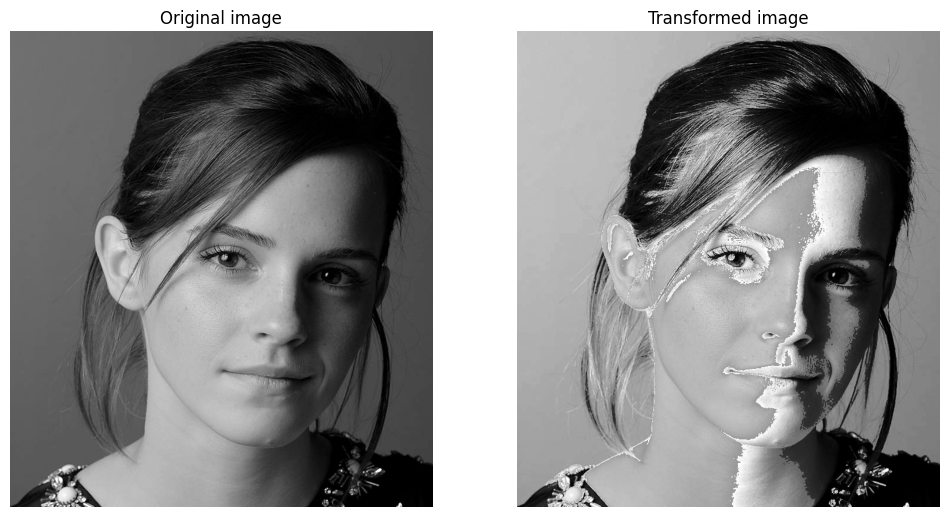

In [3]:
import cv2 as cv
img_orig = cv.imread(r'a1images\a1images\emma.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig,transform)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))  

# Display the original image
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original image')

# Display the transformed image
ax[1].imshow(image_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed image')
for a in ax:
    a.axis('off')

## Question 2

(217, 181)


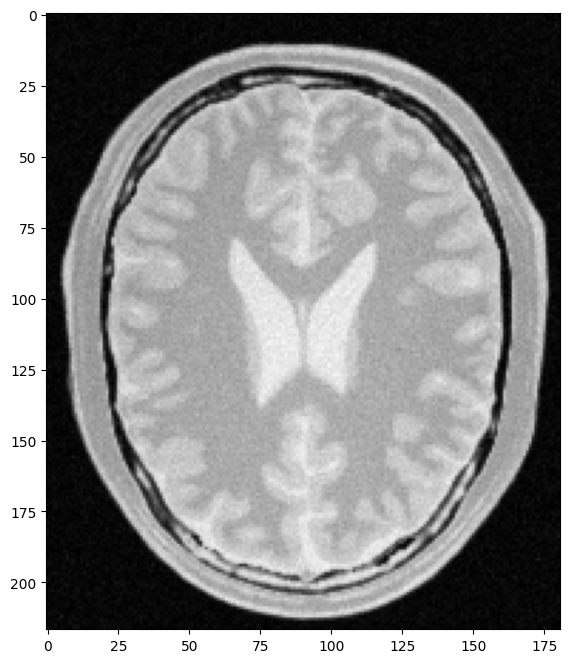

In [110]:
img_orig = cv.imread(r'a1images\a1images\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
print(img_orig.shape)
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 
ax.imshow(cv.cvtColor(img_orig,cv.COLOR_BGR2RGB))

Pixel value at (122, 125): 163
Pixel value at (147, 77): 176


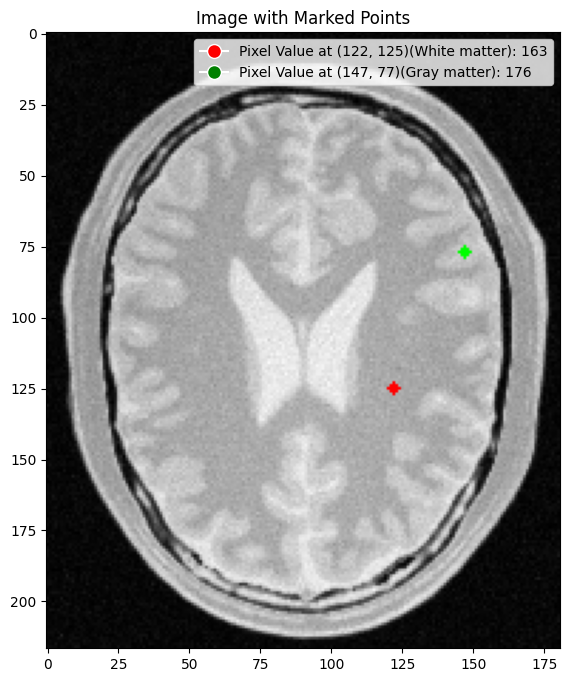

In [111]:
import cv2 as cv
import matplotlib.pyplot as plt

pixel_value1 = img_orig[122, 125]
print(f"Pixel value at (122, 125): {pixel_value1}")
pixel_value2 = img_orig[147, 77]
print(f"Pixel value at (147, 77): {pixel_value2}")

marked_image = cv.cvtColor(img_orig, cv.COLOR_GRAY2RGB) 
cv.circle(marked_image, (122, 125), 2, (255, 0, 0), -1) 
cv.circle(marked_image, (147, 77), 2, (0, 255, 0), -1)  
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(marked_image)
ax.set_title('Image with Marked Points')

legend_circle1 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=f'Pixel Value at (122, 125)(White matter): {pixel_value1}')
legend_circle2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label=f'Pixel Value at (147, 77)(Gray matter): {pixel_value2}')
ax.legend(handles=[legend_circle1, legend_circle2], loc='upper right')

plt.show()


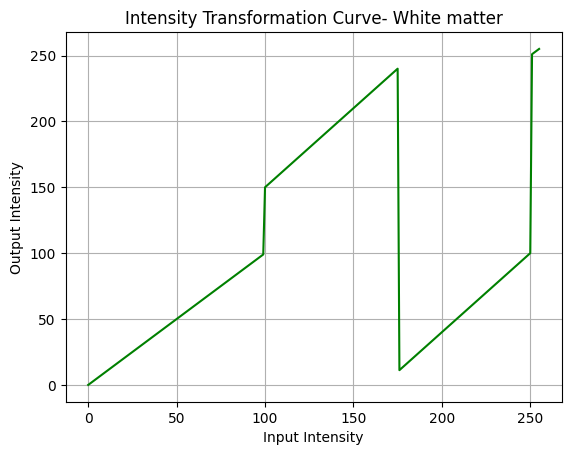

In [113]:
x_val =np.arange(0, 256)
t_white_matter = np.array([1.2 * x +30 if 100 <= x <= 175 else (1.2 * x -200 if 175 <= x <= 250 else x) for x in x_val])
plt.plot(x_val, t_white_matter, color='green', label="Transformed")

plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Intensity Transformation Curve- White matter')
plt.grid(True)
plt.show()


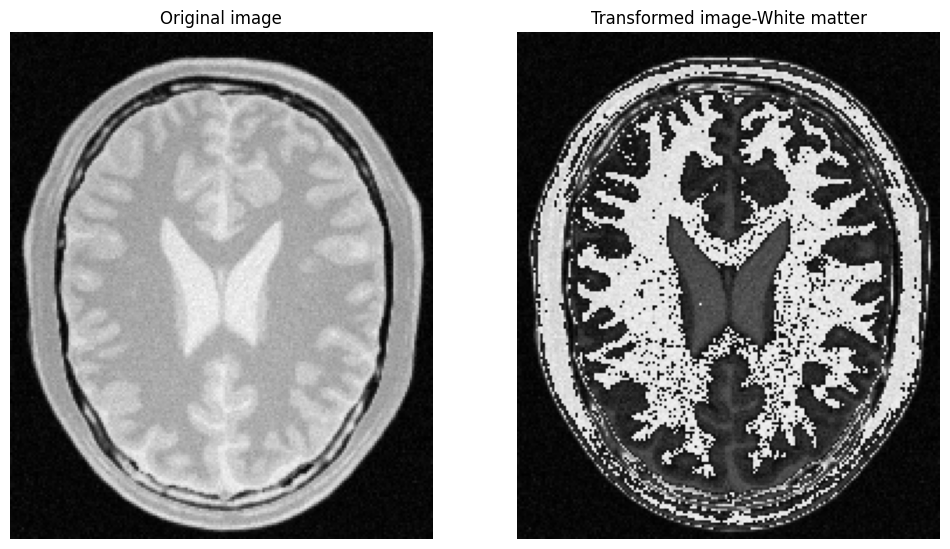

In [114]:
img_orig = cv.imread(r'a1images\a1images\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig,t_white_matter)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))  

ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original image')

ax[1].imshow(image_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed image-White matter')
for a in ax:
    a.axis('off')

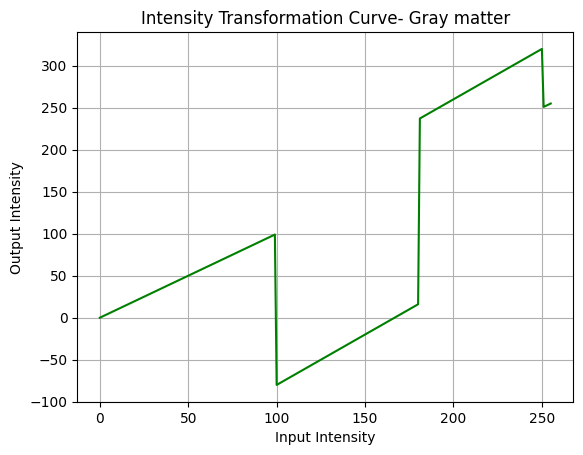

In [115]:
import numpy as np
import matplotlib.pyplot as plt

x_val =np.arange(0, 256)
t_gray_matter = np.array([1.2 * x -200 if 100 <= x <= 180 else (1.2 * x +20 if 180 <= x <= 250 else x) for x in x_val])
plt.plot(x_val, t_gray_matter, color='green', label="Transformed")

plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Intensity Transformation Curve- Gray matter')
plt.grid(True)
plt.show()

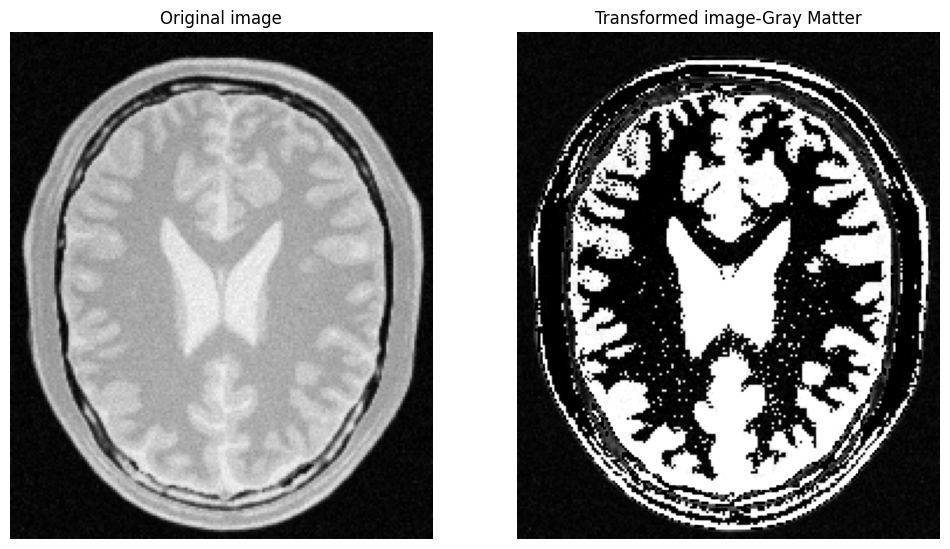

In [116]:
img_orig = cv.imread(r'a1images\a1images\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig,t_gray_matter)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))  

# Display the original image
ax[0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original image')

# Display the transformed image
ax[1].imshow(image_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed image-Gray Matter')
for a in ax:
    a.axis('off')

## Question 8

In [117]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def zoom_image_nearest_neighbor(image, zoom_factor):
    original_width, original_height = image.size
    new_width = int(original_width * zoom_factor)
    new_height = int(original_height * zoom_factor)
    
    # Create a new image
    zoomed_image = Image.new("RGB", (new_width, new_height))
    
    for y in range(new_height):
        for x in range(new_width):
            # Find the nearest neighbor pixel
            orig_x = min(int(x / zoom_factor), original_width - 1)
            orig_y = min(int(y / zoom_factor), original_height - 1)
            zoomed_image.putpixel((x, y), image.getpixel((orig_x, orig_y)))
    
    return zoomed_image

def zoom_image_bilinear(image, zoom_factor):
    original_width, original_height = image.size
    new_width = int(original_width * zoom_factor)
    new_height = int(original_height * zoom_factor)
    
    # Create a new image
    zoomed_image = Image.new("RGB", (new_width, new_height))

    for y in range(new_height):
        for x in range(new_width):
            # Calculate the position in the original image
            orig_x = (x / zoom_factor)
            orig_y = (y / zoom_factor)
            
            x1 = int(orig_x)
            y1 = int(orig_y)
            x2 = min(x1 + 1, original_width - 1)
            y2 = min(y1 + 1, original_height - 1)
            
            # Get the pixel values
            p1 = np.array(image.getpixel((x1, y1)))
            p2 = np.array(image.getpixel((x2, y1)))
            p3 = np.array(image.getpixel((x1, y2)))
            p4 = np.array(image.getpixel((x2, y2)))
            
            # Bilinear interpolation
            wx = orig_x - x1
            wy = orig_y - y1
            pixel_value = (1 - wx) * (1 - wy) * p1 + \
                          wx * (1 - wy) * p2 + \
                          (1 - wx) * wy * p3 + \
                          wx * wy * p4
            
            zoomed_image.putpixel((x, y), tuple(map(int, pixel_value)))
    
    return zoomed_image

def normalized_ssd(original, zoomed):
    original_array = np.array(original)
    zoomed_array = np.array(zoomed)
    
    # Ensure both images are the same shape
    if original_array.shape != zoomed_array.shape:
        raise ValueError("Images must have the same shape for SSD calculation.")
    
    ssd = np.sum((original_array - zoomed_array) ** 2)
    normalized_ssd_value = ssd / (original_array.shape[0] * original_array.shape[1])
    
    return normalized_ssd_value
